In [30]:
# ------------------------------------------------------------------
# Build the Support Vector Classifier Model
# Predict the loan approval status based on 
# Gender, Marital Status, Credit History, Income and Loan Amount
# ------------------------------------------------------------------

# Import Libraries and read csv file
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as met

In [31]:
loan = pd.read_csv(r"01Exercise1.csv")
loan.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


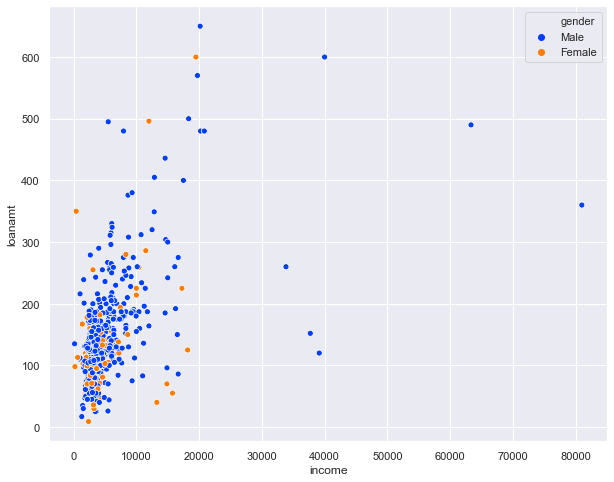

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
plot = sns.scatterplot(x = loan["income"],
                y = loan["loanamt"], hue = loan["gender"], palette = 'bright')

In [33]:
loan.shape

(614, 6)

In [34]:
#find out columns with missing values
loan.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [35]:
loan['ch'].fillna(value = loan['ch'].mean(), inplace = True)
loan['loanamt'].fillna(value = loan['loanamt'].mean(), inplace = True)

In [36]:
loan.isnull().sum()

gender     13
married     3
ch          0
income      0
loanamt     0
status      0
dtype: int64

In [37]:
# Create Dummy variables
loan.dtypes
loan = pd.get_dummies(loan, drop_first=True)
loan.head()

,ch,income,loanamt,gender_Male,married_Yes,status_Y
0,1.0,5849,146.412162,1,0,1
1,1.0,4583,128.000000,1,1,0
2,1.0,3000,66.000000,1,1,1
3,1.0,2583,120.000000,1,1,1
4,1.0,6000,141.000000,1,0,1


In [38]:
# Replace Missing Values. Drop the rows.
loan['gender_Male'].fillna(value = loan['gender_Male'].mean(), inplace = True)
loan['married_Yes'].fillna(value = loan['married_Yes'].mean(), inplace = True)
loan.isnull().sum()

ch             0
income         0
loanamt        0
gender_Male    0
married_Yes    0
status_Y       0
dtype: int64

In [39]:
loan.describe()

,ch,income,loanamt,gender_Male,married_Yes,status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,5403.459283,146.412162,0.796417,0.648208,0.687296
std,0.349681,6109.041673,84.037468,0.402991,0.477919,0.463973
min,0.000000,150.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,2877.500000,100.250000,1.000000,0.000000,0.000000
50%,1.000000,3812.500000,129.000000,1.000000,1.000000,1.000000
75%,1.000000,5795.000000,164.750000,1.000000,1.000000,1.000000
max,1.000000,81000.000000,700.000000,1.000000,1.000000,1.000000


In [40]:
# Drop irrelevant columns based on business sense

In this case, to my opinion, all Credit history, Income, Loan amount, Gender, Marital status are important to predict loan approvement by a client.

In [41]:
# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

loan['income'] = scalar.fit_transform(loan[['income']])
loan['loanamt'] = scalar.fit_transform(loan[['loanamt']])
loan.head()

,ch,income,loanamt,gender_Male,married_Yes,status_Y
0,1.0,0.072991,0.000000,1,0,1
1,1.0,-0.134412,-0.219273,1,1,0
2,1.0,-0.393747,-0.957641,1,1,1
3,1.0,-0.462062,-0.314547,1,1,1
4,1.0,0.097728,-0.064454,1,0,1


In [42]:
# Create the X (Independent) and Y (Dependent) dataframes
X = loan.iloc[:,0:5].values 
y = loan.iloc[:,5].values

In [43]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Import and build Support Vector Classifier
from sklearn.svm import SVC
sup_vec = SVC()
svc_reg = sup_vec.fit(X_train, y_train)
svc_pred = svc_reg.predict(X_test)

In [45]:
# Predict the outcome using Test data
prediction = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': svc_pred.flatten()})
prediction

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
180,1,1
181,1,1
182,1,1
183,0,1


In [46]:
# Build the conufsion matrix and get the accuracy/score
print(met.confusion_matrix(svc_pred, y_test))
print(met.classification_report(svc_pred, y_test))
print(met.accuracy_score(y_test, svc_pred))

[[ 21   2]
 [ 30 132]]
              precision    recall  f1-score   support

           0       0.41      0.91      0.57        23
           1       0.99      0.81      0.89       162

    accuracy                           0.83       185
   macro avg       0.70      0.86      0.73       185
weighted avg       0.91      0.83      0.85       185

0.827027027027027
